In [ ]:
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
red_wine = pd.read_csv('../data/01_raw/winequality-red.csv', sep=';')
white_wine = pd.read_csv('../data/01_raw/winequality-white.csv', sep=';')

In [21]:
red_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [22]:
white_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [23]:
# Merging into one df 
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

wine = pd.concat([red_wine, white_wine], ignore_index=True)

In [24]:
wine.dtypes 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

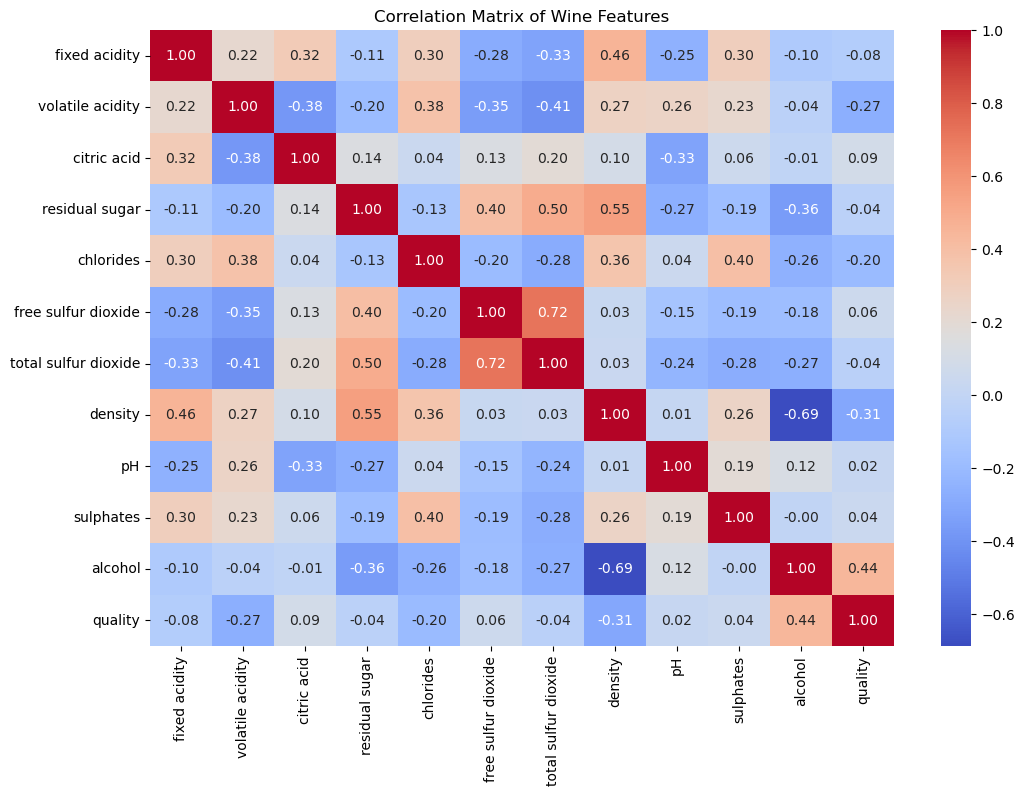

Top correlated variable pairs:
total sulfur dioxide  free sulfur dioxide     0.720934
free sulfur dioxide   total sulfur dioxide    0.720934
alcohol               density                 0.686745
density               alcohol                 0.686745
                      residual sugar          0.552517
residual sugar        density                 0.552517
                      total sulfur dioxide    0.495482
total sulfur dioxide  residual sugar          0.495482
density               fixed acidity           0.458910
fixed acidity         density                 0.458910
dtype: float64


In [ ]:
wine_numerical = wine.select_dtypes(include='number')

corr = wine_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Wine Features')
plt.show()

corr_pairs = corr.unstack()
corr_pairs = corr_pairs[corr_pairs < 1] 
sorted_corr = corr_pairs.abs().sort_values(ascending=False)
print("Top correlated variable pairs:")
print(sorted_corr.head(10))  

In [26]:
wine.shape

(6497, 13)

In [28]:
for column in wine.columns:
    print(column)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality
wine_type


In [29]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [31]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


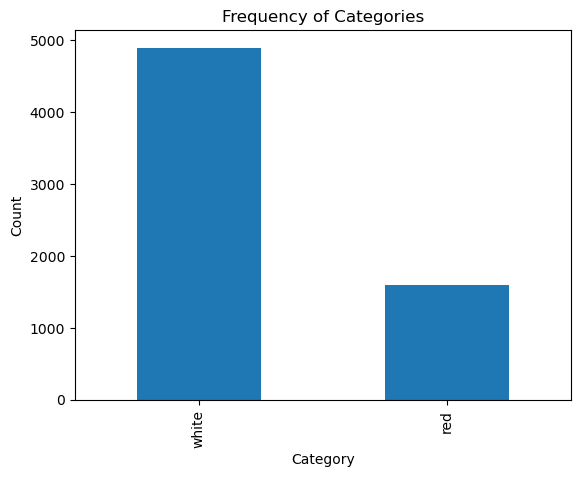

In [33]:
counts = wine['wine_type'].value_counts()

counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequency of Categories')
plt.show()

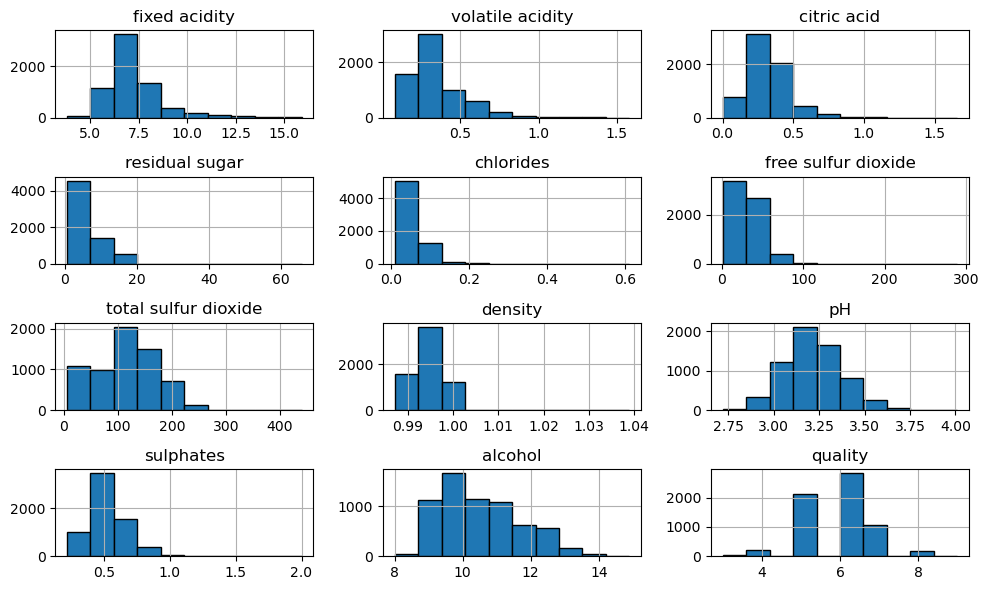

In [34]:
wine.hist(figsize=(10, 6), bins=10, edgecolor='black')
plt.tight_layout()
plt.show()

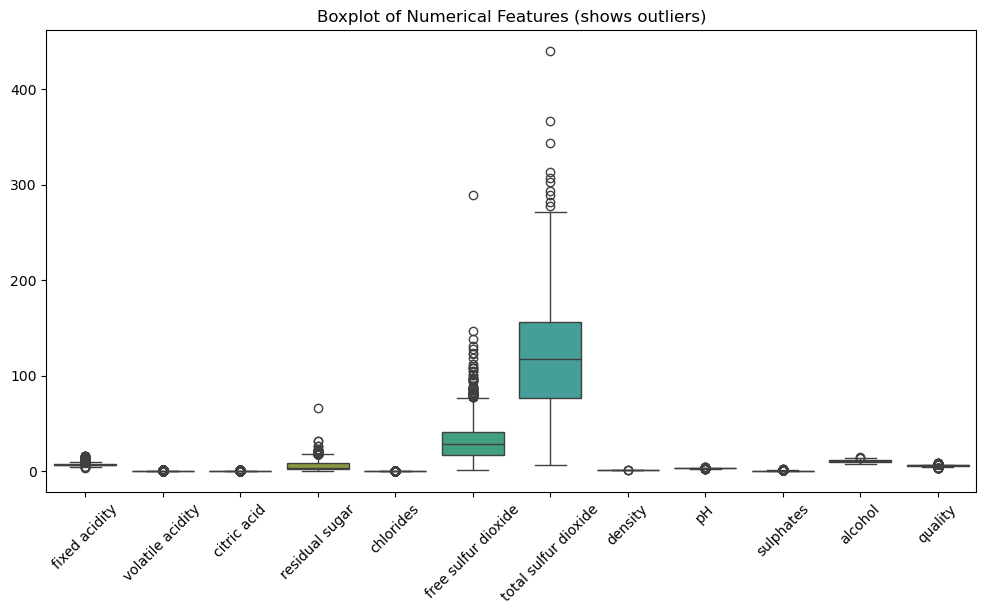

In [37]:
numerical_cols = wine.select_dtypes(include='number').columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=wine[numerical_cols])
plt.title('Boxplot of Numerical Features (shows outliers)')
plt.xticks(rotation=45)
plt.show()

# Removing the outliers using IQR

In [ ]:
numerical_cols = wine.select_dtypes(include='number').columns
wine_clean = wine.copy() 

for col in numerical_cols:
    Q1 = wine_clean[col].quantile(0.25)
    Q3 = wine_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    wine_clean = wine_clean[(wine_clean[col] >= Q1 - 1.5 * IQR) & 
                            (wine_clean[col] <= Q3 + 1.5 * IQR)]

print(f"Original data shape: {wine.shape}")
print(f"Data shape after removing outliers: {wine_clean.shape}")

Original data shape: (6497, 13)
Data shape after removing outliers: (4418, 13)
